In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import metrics

In [2]:
df_data=pd.read_csv("D:\\data_vis\\DATA_FOR_PROJECT\\country\\201301\\CN-Reanalysis-daily-2013010100.csv")
df_data.head()

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa),lat,lon,AQI,Major pollutants,id
0,20.209999,23.559999,8.65,4.58,0.29,63.439999,-2.48,-2.31,291.540009,68.139999,100350.109375,18.34,109.25,28.871428,PM2.5,0
1,20.410000,23.959999,9.28,5.24,0.29,62.529999,-3.43,-3.21,291.959991,67.410004,100546.632812,18.34,109.38,29.157143,PM2.5,1
2,21.170000,24.780001,10.07,5.47,0.30,62.240002,-3.43,-4.72,291.369995,69.589996,100428.132812,18.33,109.52,30.242857,PM2.5,2
3,22.240000,26.040001,10.36,5.28,0.30,63.580002,-2.92,-5.32,290.739990,72.940002,100569.273438,18.33,109.66,31.771429,PM2.5,3
4,19.680000,22.340000,7.62,3.58,0.29,66.209999,-2.51,-3.13,291.670013,65.970001,101620.343750,18.49,108.83,28.114286,PM2.5,4


In [3]:
X=df_data.drop(columns=["lat","lon","AQI","Major pollutants","id"],inplace=False)
X.head()

,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa)
0,20.209999,23.559999,8.65,4.58,0.29,63.439999,-2.48,-2.31,291.540009,68.139999,100350.109375
1,20.410000,23.959999,9.28,5.24,0.29,62.529999,-3.43,-3.21,291.959991,67.410004,100546.632812
2,21.170000,24.780001,10.07,5.47,0.30,62.240002,-3.43,-4.72,291.369995,69.589996,100428.132812
3,22.240000,26.040001,10.36,5.28,0.30,63.580002,-2.92,-5.32,290.739990,72.940002,100569.273438
4,19.680000,22.340000,7.62,3.58,0.29,66.209999,-2.51,-3.13,291.670013,65.970001,101620.343750


In [4]:
X=np.array(X)

In [19]:
cluster_score=[]
method=[]

In [17]:
#使用Birch聚类查看效果
brc=Birch(n_clusters=None)
brc.fit(X)

Birch(n_clusters=None)

In [18]:
from sklearn import metrics

In [20]:
num=brc.predict(X)
method.append("Birch")
cluster_score.append(metrics.calinski_harabasz_score(X, num))

In [21]:
#使用DBSCAN聚类
clustering = DBSCAN(eps=3, min_samples=3).fit(X)
method.append("DBSCAN")
cluster_score.append(metrics.calinski_harabasz_score(X, clustering.labels_))

In [23]:
cluster_score

[882391497.4626384, 2.2186859643183374]

In [24]:
kmeans=KMeans(n_clusters=5).fit(X)
cluster_score.append(metrics.calinski_harabasz_score(X, kmeans.labels_))

In [25]:
cluster_score

[882391497.4626384, 2.2186859643183374, 382074.1841166502]

In [28]:
cluster_num=[]
num=np.unique(num)
cluster_num.append(len(num))
cluster_num.append(len(np.unique(clustering.labels_)))
cluster_num.append(5)

In [29]:
cluster_num

[42239, 21, 5]

In [32]:
method.append("KMEANS")

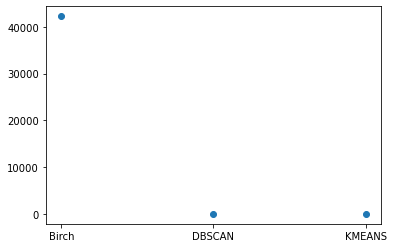

In [33]:
import matplotlib.pyplot as plt
plt.scatter(method,cluster_num)
plt.show()

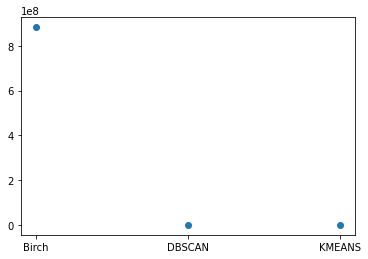

In [35]:
import matplotlib.pyplot as plt
plt.scatter(method,cluster_score)
plt.show()

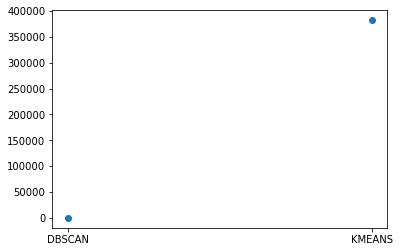

In [36]:
import matplotlib.pyplot as plt
plt.scatter(method[1:],cluster_score[1:])
plt.show()

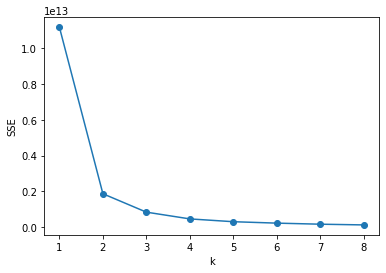

In [37]:
#手肘法
# 从Excel中读取数据存入数组
# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    SSE.append(estimator.inertia_)
xscale = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(xscale, SSE, 'o-')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()